In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
TRAIN_VAL_SPLIT = 1000
WINDOW_SIZE = 20
BATCH_SIZE = 32
SHUFFER_BUFFER_SIZE = 1000

In [3]:
from util import load_synthesized_data, build_dataset

df_train, df_val = load_synthesized_data(split=1000)
y_train = df_train['y'].values

dataset = build_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, SHUFFER_BUFFER_SIZE)

## Deeper model

In [4]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

def build_model():
    model = Sequential([
        Dense(10, input_shape=[WINDOW_SIZE], activation='relu'),
        Dense(10, activation='relu'),
        Dense(1)
    ])
    return model

In [5]:
from util import clear_env

clear_env()

model = build_model()
model.compile(loss='mse', optimizer=SGD(lr=1e-6, momentum=0.9))

history = model.fit(dataset, epochs=100, verbose=0)

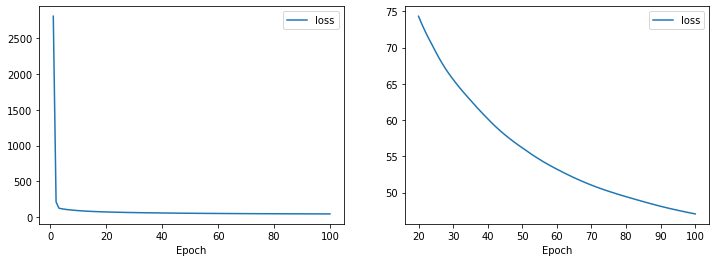

In [6]:
from util import plot_history, validate_model

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plot_history(history)
plt.subplot(1,2,2)
plot_history(history, start_epoch=20)
plt.show()

MSE: 51.18828117687534, MAE: 5.219104205015249


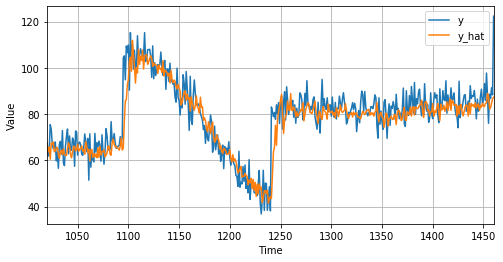

In [7]:
validate_model(model, df_val, WINDOW_SIZE)

## Search learning rate 

In [8]:
from tensorflow.keras.callbacks import LearningRateScheduler

clear_env()

model = build_model()
model.compile(loss='mse', optimizer=SGD(lr=1e-8, momentum=0.9))

def learning_rate(epoch):
    return 1e-8 * 10**(epoch / 20)

lr_schedule = LearningRateScheduler(learning_rate)

history = model.fit(dataset, epochs=100, callbacks=[lr_schedule], verbose=0)

[1e-08, 0.001, 0, 300]

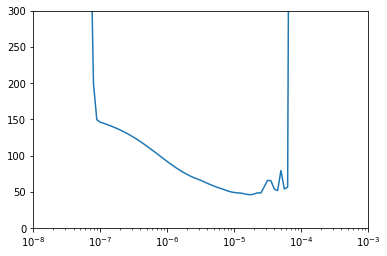

In [9]:
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([1e-8, 1e-3, 0, 300])

Select learning rate = 5e-6.

In [10]:
clear_env()

model = build_model()
model.compile(loss='mse', optimizer=SGD(lr=5e-6, momentum=0.9))

history = model.fit(dataset, epochs=200, verbose=0)

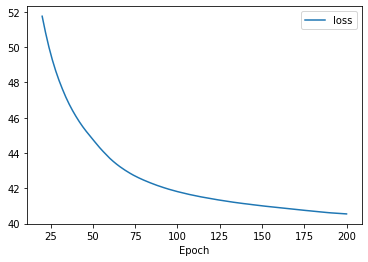

In [11]:
plot_history(history, 20)

MSE: 48.95326817257315, MAE: 5.100983578154725


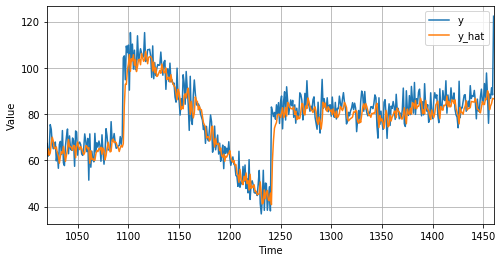

In [12]:
validate_model(model, df_val, WINDOW_SIZE)